In [1]:
!pip install geopy
from itertools import combinations
from geopy.distance import geodesic
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:


#Data for the full set of stores provided by the user, extracted from the image
full_chicago_data = [
    (42.07725859, -87.8327529), (42.03341295, -87.77370139), (42.02627243, -87.71464988),
    (41.9578868, -87.74486228), (41.95278045, -87.64461204), (41.91498074, -87.73936912),
    (41.86619949, -87.68946246), (41.8460794, -87.74889164), (41.78245832, -87.74348899),
    (41.79373755, -87.66244919), (41.75263937, -87.6170669), (41.73328994, -87.7121536),
    (41.7082883, -87.63759698), (41.70748164, -87.62895274), (43.03755398, -83.65613683),
    (42.86343578, -83.98773447), (42.6983544, -83.36877874), (42.59856098, -83.44244199),
    (42.59431696, -83.18300642), (42.56458075, -83.03029927), (42.52582794, -83.0229937),
    (42.52905826, -82.92948242), (42.50364493, -83.33931262), (42.47119785, -83.27551194),
    (42.39488099, -83.39431321), (42.35424905, -83.15671067), (42.30708307, -83.34371267),
    (42.23056656, -83.14351053), (42.21101554, -83.4581139), (42.27969309, -83.487573),
    (42.21600569, -83.73403293), (42.81763049, -83.58435596), (42.33435269, -84.42313905),
    (42.24609616, -85.35618419), (43.63143231, -85.94468972), (39.76977693, -87.43025965),
    (39.50020697, -87.33344137), (39.16609958, -87.09511944), (38.77235702, -87.1398048),
    (39.22958742, -86.29078292), (39.72396689, -86.79721702), (39.67526916, -86.32650644),
    (39.62245484, -86.07852689), (39.6889612, -86.14030953), (39.80170438, -85.97273195),
    (39.88504474, -85.94416759), (39.95660734, -86.14030953), (39.87442591, -86.07135422),
    (39.85268684, -86.16458027), (39.8667786, -85.32329926), (40.09224603, -85.37233909)
]

# Calculate the distance between each store using geodesic
full_chicago_distances = {
    (i+1, j+1): geodesic(full_chicago_data[i], full_chicago_data[j]).kilometers
    for i, j in combinations(range(len(full_chicago_data)), 2)
}

full_chicago_distances

{(1, 2): 6.900205466814479,
 (1, 3): 11.298757746514248,
 (1, 4): 15.126071395271952,
 (1, 5): 20.833235109347576,
 (1, 6): 19.615239025610336,
 (1, 7): 26.279879405659532,
 (1, 8): 26.602146427452446,
 (1, 9): 33.57061233610959,
 (1, 10): 34.51356479510867,
 (1, 11): 40.25182392692011,
 (1, 12): 39.493787558761774,
 (1, 13): 44.066168349121185,
 (1, 14): 44.41772139683088,
 (1, 15): 359.157812748783,
 (1, 16): 328.0094837365533,
 (1, 17): 373.9602121385262,
 (1, 18): 366.370419989942,
 (1, 19): 387.43168119729364,
 (1, 20): 399.5090171557695,
 (1, 21): 399.66713791594964,
 (1, 22): 407.3494695626882,
 (1, 23): 373.55584856635596,
 (1, 24): 378.4363709268583,
 (1, 25): 368.0178256634124,
 (1, 26): 387.27661876262533,
 (1, 27): 371.63345102405486,
 (1, 28): 387.8945150776501,
 (1, 29): 361.88835460008715,
 (1, 30): 359.6578878749679,
 (1, 31): 339.11889780786987,
 (1, 32): 359.00828004106626,
 (1, 33): 283.0019749926214,
 (1, 34): 205.51541414513412,
 (1, 35): 231.55293840088254,
 (1, 3

In [3]:

# Warehouse coordinates
warehouse_coord = (41.106868641142825, -85.13701562004692)

# Store coordinates
full_chicago_data = [
    (42.07725859, -87.8327529), (42.03341295, -87.77370139), (42.02627243, -87.71464988),
    (41.9578868, -87.74486228), (41.95278045, -87.64461204), (41.91498074, -87.73936912),
    (41.86619949, -87.68946246), (41.8460794, -87.74889164), (41.78245832, -87.74348899),
    (41.79373755, -87.66244919), (41.75263937, -87.6170669), (41.73328994, -87.7121536),
    (41.7082883, -87.63759698), (41.70748164, -87.62895274), (43.03755398, -83.65613683),
    (42.86343578, -83.98773447), (42.6983544, -83.36877874), (42.59856098, -83.44244199),
    (42.59431696, -83.18300642), (42.56458075, -83.03029927), (42.52582794, -83.0229937),
    (42.52905826, -82.92948242), (42.50364493, -83.33931262), (42.47119785, -83.27551194),
    (42.39488099, -83.39431321), (42.35424905, -83.15671067), (42.30708307, -83.34371267),
    (42.23056656, -83.14351053), (42.21101554, -83.4581139), (42.27969309, -83.487573),
    (42.21600569, -83.73403293), (42.81763049, -83.58435596), (42.33435269, -84.42313905),
    (42.24609616, -85.35618419), (43.63143231, -85.94468972), (39.76977693, -87.43025965),
    (39.50020697, -87.33344137), (39.16609958, -87.09511944), (38.77235702, -87.1398048),
    (39.22958742, -86.29078292), (39.72396689, -86.79721702), (39.67526916, -86.32650644),
    (39.62245484, -86.07852689), (39.6889612, -86.14030953), (39.80170438, -85.97273195),
    (39.88504474, -85.94416759), (39.95660734, -86.14030953), (39.87442591, -86.07135422),
    (39.85268684, -86.16458027), (39.8667786, -85.32329926), (40.09224603, -85.37233909)
]

# Function to calculate distance
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).miles

# Calculate distances
distances = []
for i, full_chicago_data in enumerate(full_chicago_data, 1):
    distance = calculate_distance(warehouse_coord,full_chicago_data )
    distances.append((f"Store {i}", distance))

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Store', 'Distance to Warehouse (miles)'])

# Display the DataFrame
print(distance_df)


       Store  Distance to Warehouse (miles)
0    Store 1                     154.878317
1    Store 2                     150.860516
2    Store 3                     147.889303
3    Store 4                     147.427186
4    Store 5                     142.534593
5    Store 6                     146.051056
6    Store 7                     142.435595
7    Store 8                     144.832086
8    Store 9                     143.142344
9   Store 10                     139.422934
10  Store 11                     136.294380
11  Store 12                     140.572783
12  Store 13                     136.382021
13  Store 14                     135.938107
14  Store 15                     153.471032
15  Store 16                     134.903504
16  Store 17                     142.738641
17  Store 18                     135.065699
18  Store 19                     143.884629
19  Store 20                     148.127711
20  Store 21                     146.629380
21  Store 22                    

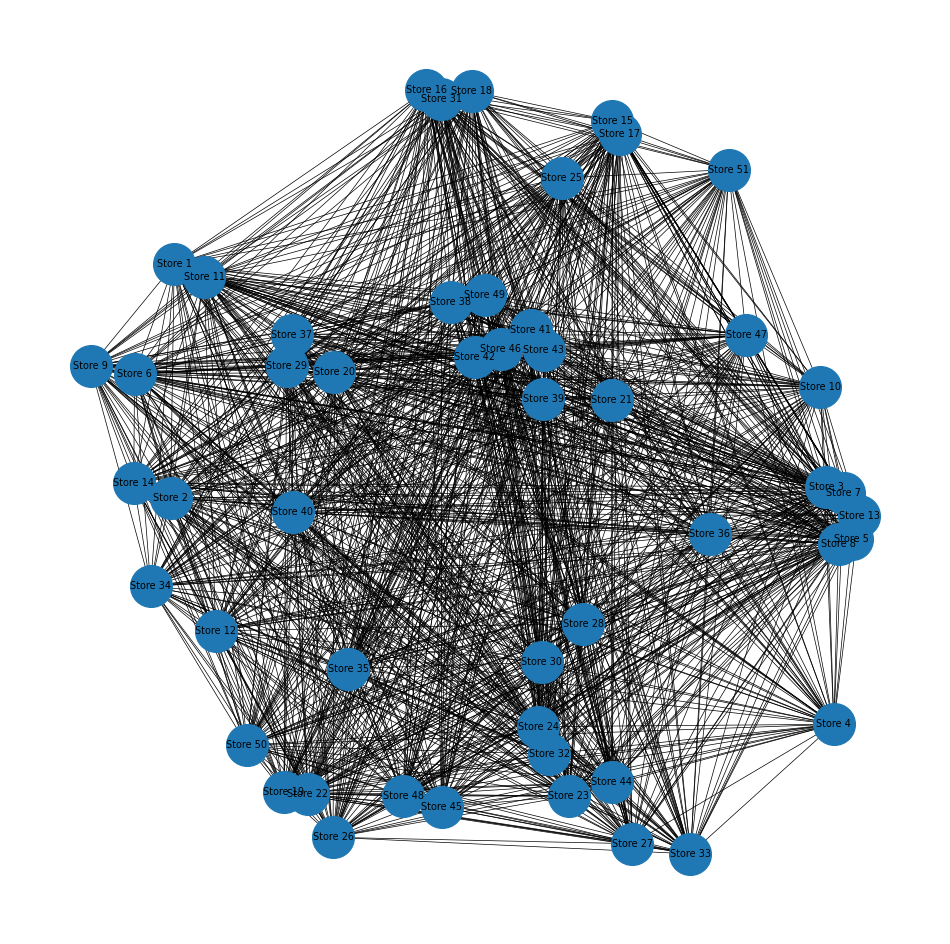

In [4]:


# Create a graph
G = nx.Graph()

# Add edges to the graph with distances as weights
for (i, j), distance in full_chicago_distances.items():
    G.add_edge(f"Store {i}", f"Store {j}", weight=distance)

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=900)

# edges
nx.draw_networkx_edges(G, pos, width=0.5)

# labels
nx.draw_networkx_labels(G, pos, font_size=7, font_family="sans-serif")

plt.axis("off")
plt.show()


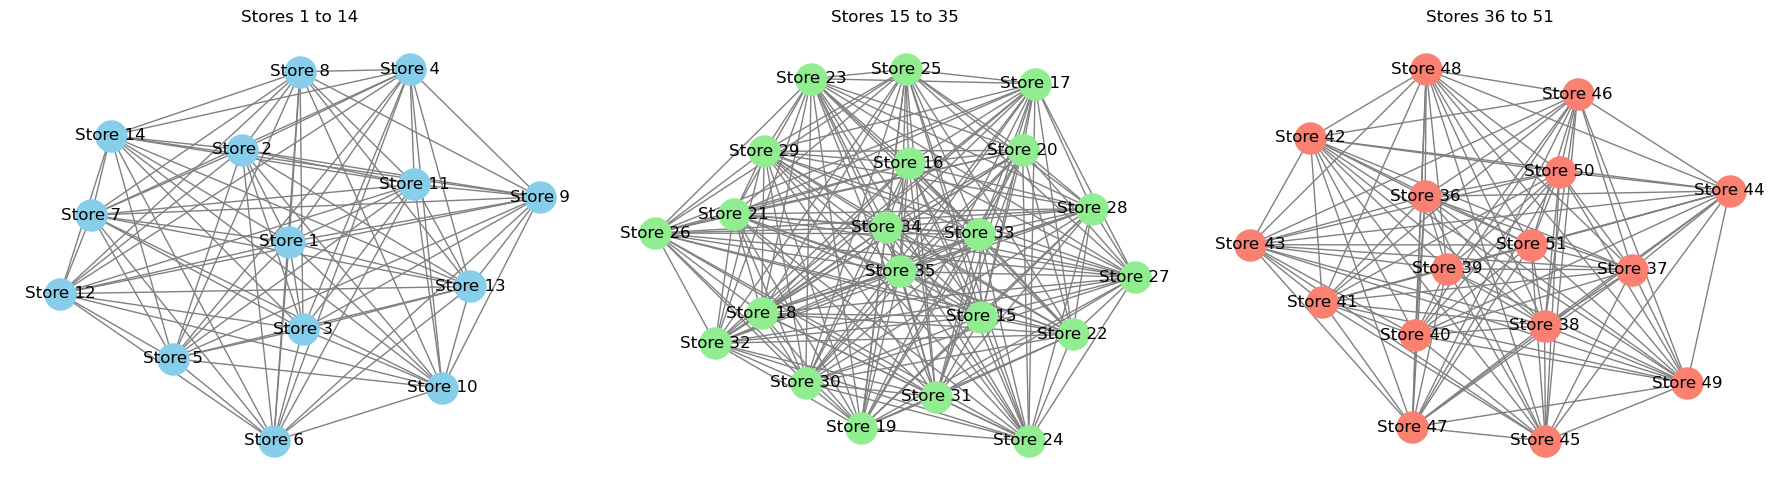

In [5]:
# First, we'll create subgraphs for the specified ranges of stores

# Subgraph for stores 1 to 14
G1_14 = G.subgraph([f"Store {i}" for i in range(1, 15)])

# Subgraph for stores 15 to 35
G15_35 = G.subgraph([f"Store {i}" for i in range(15, 36)])

# Subgraph for stores 36 to 51
G36_51 = G.subgraph([f"Store {i}" for i in range(36, 52)])

# Now we will visualize each network separately
plt.figure(figsize=(18, 5))

# Stores 1 to 14
plt.subplot(131)
pos1_14 = nx.spring_layout(G1_14)
nx.draw(G1_14, pos1_14, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
plt.title("Stores 1 to 14")

# Stores 15 to 35
plt.subplot(132)
pos15_35 = nx.spring_layout(G15_35)
nx.draw(G15_35, pos15_35, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500)
plt.title("Stores 15 to 35")

# Stores 36 to 51
plt.subplot(133)
pos36_51 = nx.spring_layout(G36_51)
nx.draw(G36_51, pos36_51, with_labels=True, node_color='salmon', edge_color='gray', node_size=500)
plt.title("Stores 36 to 51")

plt.tight_layout()
plt.show()

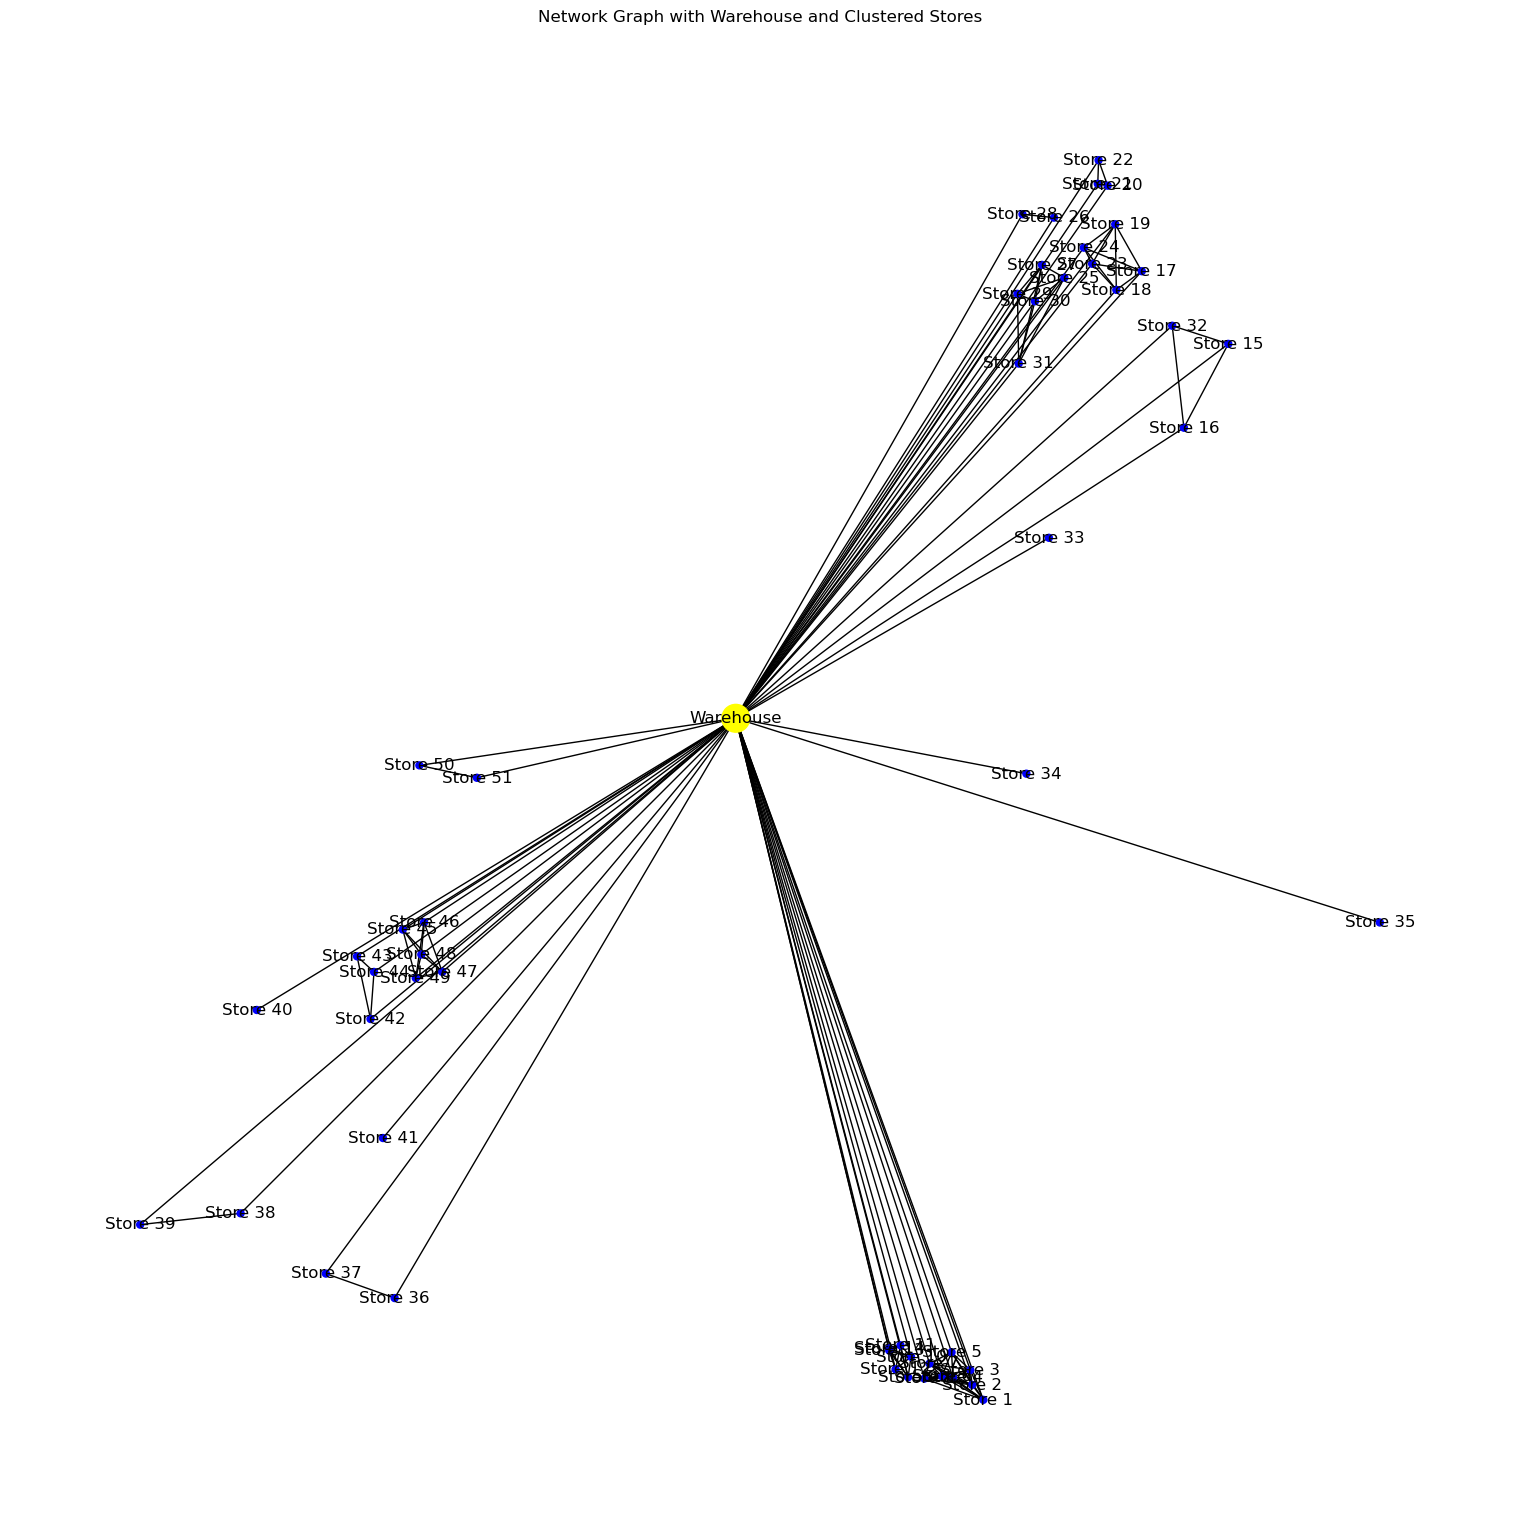

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import AgglomerativeClustering

# Store coordinates
store_coords = [ (42.07725859, -87.8327529), (42.03341295, -87.77370139), (42.02627243, -87.71464988),
    (41.9578868, -87.74486228), (41.95278045, -87.64461204), (41.91498074, -87.73936912),
    (41.86619949, -87.68946246), (41.8460794, -87.74889164), (41.78245832, -87.74348899),
    (41.79373755, -87.66244919), (41.75263937, -87.6170669), (41.73328994, -87.7121536),
    (41.7082883, -87.63759698), (41.70748164, -87.62895274), (43.03755398, -83.65613683),
    (42.86343578, -83.98773447), (42.6983544, -83.36877874), (42.59856098, -83.44244199),
    (42.59431696, -83.18300642), (42.56458075, -83.03029927), (42.52582794, -83.0229937),
    (42.52905826, -82.92948242), (42.50364493, -83.33931262), (42.47119785, -83.27551194),
    (42.39488099, -83.39431321), (42.35424905, -83.15671067), (42.30708307, -83.34371267),
    (42.23056656, -83.14351053), (42.21101554, -83.4581139), (42.27969309, -83.487573),
    (42.21600569, -83.73403293), (42.81763049, -83.58435596), (42.33435269, -84.42313905),
    (42.24609616, -85.35618419), (43.63143231, -85.94468972), (39.76977693, -87.43025965),
    (39.50020697, -87.33344137), (39.16609958, -87.09511944), (38.77235702, -87.1398048),
    (39.22958742, -86.29078292), (39.72396689, -86.79721702), (39.67526916, -86.32650644),
    (39.62245484, -86.07852689), (39.6889612, -86.14030953), (39.80170438, -85.97273195),
    (39.88504474, -85.94416759), (39.95660734, -86.14030953), (39.87442591, -86.07135422),
    (39.85268684, -86.16458027), (39.8667786, -85.32329926), (40.09224603, -85.37233909)
    
]

# Using Agglomerative Clustering to form 17 clusters (51 stores, 3 stores per cluster)
clustering = AgglomerativeClustering(n_clusters=17)
labels = clustering.fit_predict(store_coords)

# Create a graph
G = nx.Graph()

# Add node for the warehouse
warehouse_coord = (41.106868641142825, -85.13701562004692)
G.add_node("Warehouse", pos=warehouse_coord, color='yellow', size=400)

# Add nodes for the stores with cluster labels
for i, coord in enumerate(store_coords):
    G.add_node(f"Store {i+1}", pos=coord, color='blue', size=25, cluster=f'Cluster {labels[i]+1}')

# Add edges from warehouse to each store
for i in range(51):
    G.add_edge("Warehouse", f"Store {i+1}", weight=1)

# Add edges within each cluster
for i in range(len(store_coords)):
    for j in range(i + 1, len(store_coords)):
        if labels[i] == labels[j]:
            G.add_edge(f"Store {i+1}", f"Store {j+1}", weight=1)

# Draw the network graph
plt.figure(figsize=(15, 15))
pos = nx.get_node_attributes(G, 'pos')
node_colors = [data['color'] for node, data in G.nodes(data=True)]
sizes = [data['size'] for node, data in G.nodes(data=True)]

nx.draw(G, pos, node_color=node_colors, node_size=sizes, with_labels=True)

plt.title("Network Graph with Warehouse and Clustered Stores")
plt.axis("off")
plt.show()


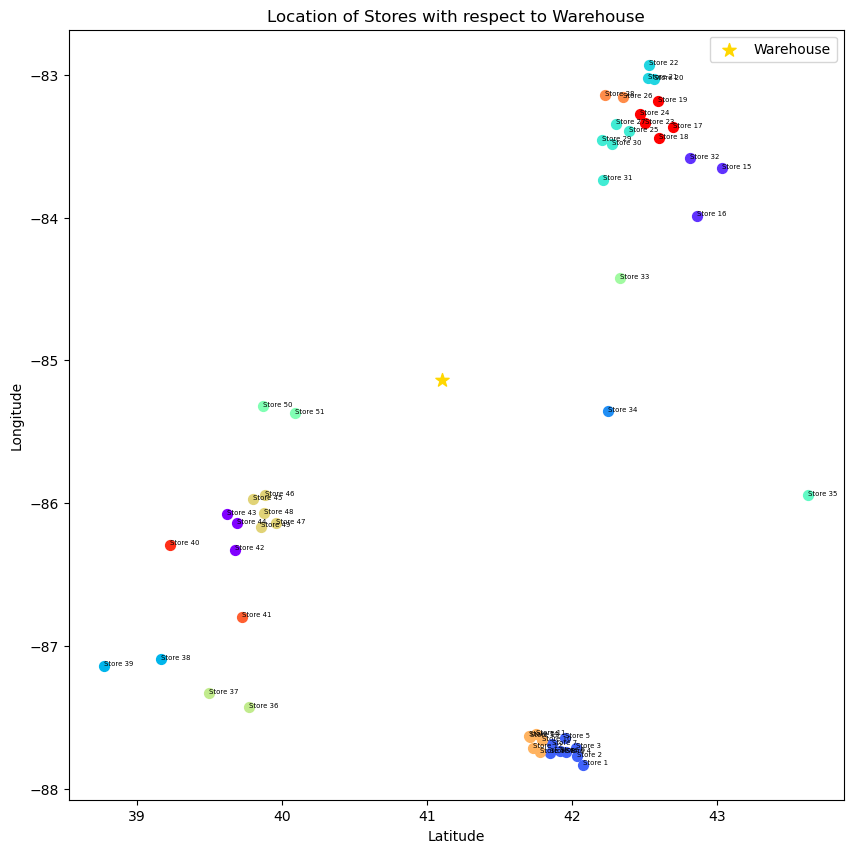

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming store_coords and warehouse_coord are already defined
# Perform K-Means clustering
num_clusters = 17  # Replace N with the actual number of clusters you want
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(store_coords)

# Plotting
plt.figure(figsize=(10, 10))

# Plot the warehouse
plt.scatter(*warehouse_coord, color='gold', s=100, label='Warehouse', marker='*')

# Plot each store, colored by cluster
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))
for i, coord in enumerate(store_coords):
    plt.scatter(*coord, color=colors[clusters[i]], s=50)

# Optional: Add labels for each store
for i, coord in enumerate(store_coords):
    plt.text(coord[0], coord[1], f'Store {i+1}', fontsize=5)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Location of Stores with respect to Warehouse')
plt.legend()
plt.show()



In [8]:


# Assuming store_coords is a list of (latitude, longitude) tuples for the 51 stores

# Define the number of clusters
num_clusters = 17  # Replace N with your desired number of clusters

# Perform clustering
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(store_coords)

# Print cluster assignments
for i, cluster in enumerate(clusters):
    print(f"Store {i+1} is in Cluster {cluster+1}")
    

Store 1 is in Cluster 14
Store 2 is in Cluster 14
Store 3 is in Cluster 14
Store 4 is in Cluster 14
Store 5 is in Cluster 14
Store 6 is in Cluster 14
Store 7 is in Cluster 3
Store 8 is in Cluster 3
Store 9 is in Cluster 3
Store 10 is in Cluster 3
Store 11 is in Cluster 3
Store 12 is in Cluster 3
Store 13 is in Cluster 3
Store 14 is in Cluster 3
Store 15 is in Cluster 12
Store 16 is in Cluster 12
Store 17 is in Cluster 6
Store 18 is in Cluster 6
Store 19 is in Cluster 1
Store 20 is in Cluster 1
Store 21 is in Cluster 1
Store 22 is in Cluster 1
Store 23 is in Cluster 6
Store 24 is in Cluster 6
Store 25 is in Cluster 15
Store 26 is in Cluster 16
Store 27 is in Cluster 15
Store 28 is in Cluster 16
Store 29 is in Cluster 15
Store 30 is in Cluster 15
Store 31 is in Cluster 15
Store 32 is in Cluster 12
Store 33 is in Cluster 9
Store 34 is in Cluster 4
Store 35 is in Cluster 7
Store 36 is in Cluster 11
Store 37 is in Cluster 11
Store 38 is in Cluster 5
Store 39 is in Cluster 5
Store 40 is in C

Centroids of each cluster: [[ 42.55344598 -83.04144545]
 [ 39.87409384 -86.05862871]
 [ 41.77377175 -87.68000781]
 [ 42.24609616 -85.35618419]
 [ 38.9692283  -87.11746212]
 [ 42.56793954 -83.35651132]
 [ 43.63143231 -85.94468972]
 [ 39.97951232 -85.34781917]
 [ 42.33435269 -84.42313905]
 [ 39.22958742 -86.29078292]
 [ 39.63499195 -87.38185051]
 [ 42.90620675 -83.74274242]
 [ 39.72396689 -86.79721702]
 [ 41.99376533 -87.74165793]
 [ 42.28173568 -83.48354914]
 [ 42.2924078  -83.1501106 ]
 [ 39.6622284  -86.18178095]]


/var/folders/ys/g7419t1d1fqbfdm8cxnh5wfc0000gn/T/ipykernel_9879/2537292582.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*centroid, color=colors[i], s=200, marker='+', edgecolor='black', label=f'Centroid {i+1}')


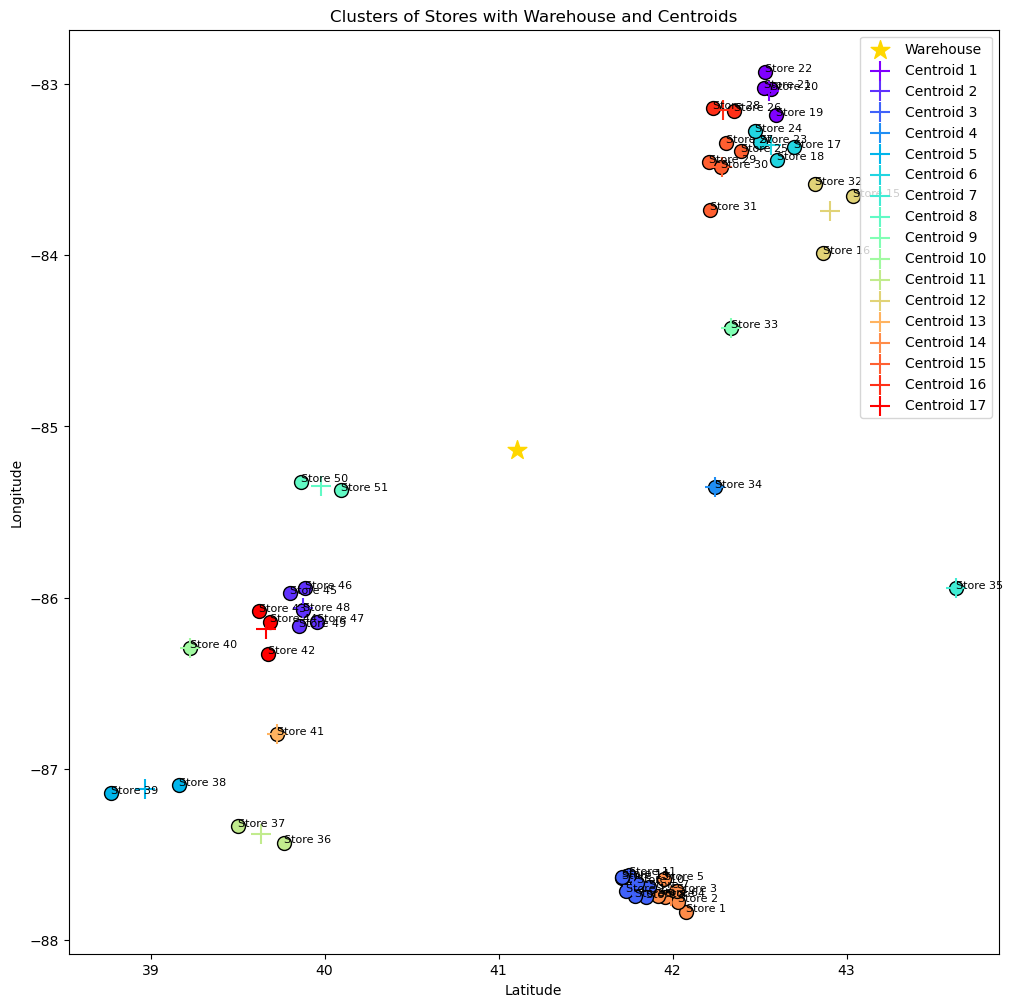

In [9]:


# Initialize an array to hold the centroid of each cluster
centroids = np.zeros((num_clusters, 2))

for i in range(num_clusters):
    # Get the indices of stores in this cluster
    indices = [j for j, cluster_id in enumerate(clusters) if cluster_id == i]
    
    # Calculate the centroid of these stores
    centroid = np.mean([store_coords[j] for j in indices], axis=0)
    centroids[i] = centroid

print("Centroids of each cluster:", centroids)

# Assuming the centroids, store_coords, and warehouse_coord are defined
num_clusters = len(centroids)

# Plotting
plt.figure(figsize=(12, 12))

# Plot the warehouse
plt.scatter(*warehouse_coord, color='gold', s=200, label='Warehouse', marker='*')

# Plot each store, colored by cluster
colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))
for i, coord in enumerate(store_coords):
    plt.scatter(*coord, color=colors[clusters[i]], s=100, edgecolor='black')
    

# Plot centroids of each cluster
for i, centroid in enumerate(centroids):
    
    plt.scatter(*centroid, color=colors[i], s=200, marker='+', edgecolor='black', label=f'Centroid {i+1}')

# Optional: Add labels for each store
for i, coord in enumerate(store_coords):
    plt.text(coord[0], coord[1], f'Store {i+1}', fontsize=8)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters of Stores with Warehouse and Centroids')
plt.legend()
plt.show()


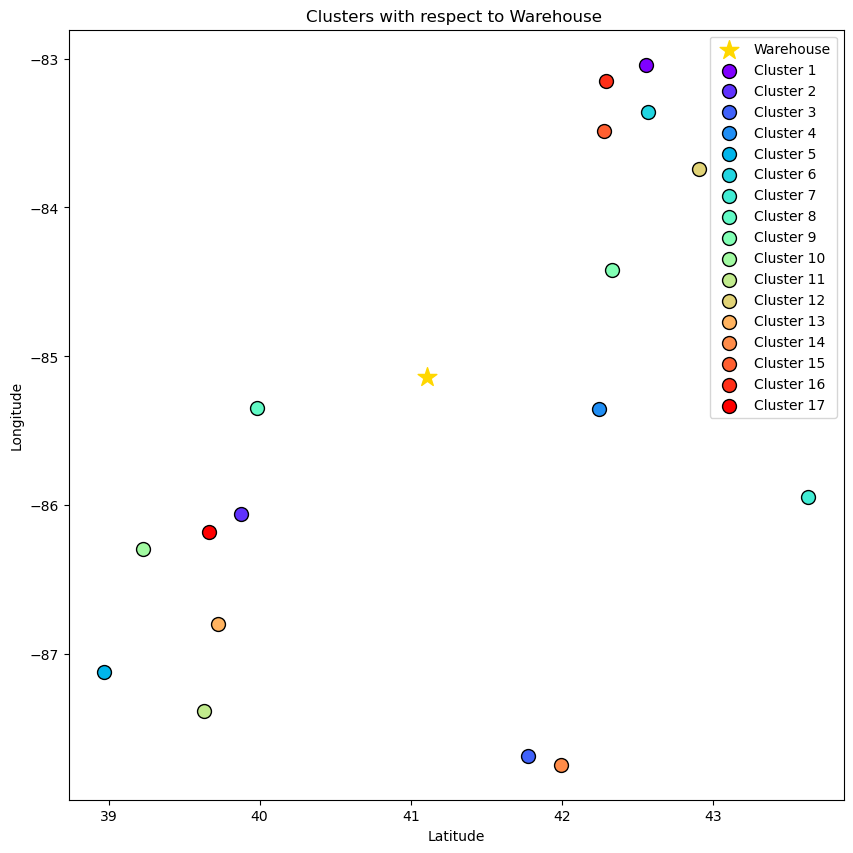

In [10]:
import matplotlib.pyplot as plt

# Assuming the centroids, store_coords, and warehouse_coord are defined
num_clusters = len(centroids)

# Plotting
plt.figure(figsize=(10, 10))

# Plot the warehouse
plt.scatter(*warehouse_coord, color='gold', s=200, label='Warehouse', marker='*')


# Plot centroids of each cluster
for i, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colors[i], s=100, marker='o', edgecolor='black', label=f'Cluster {i+1}')


plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters with respect to Warehouse ')
plt.legend()
plt.show()



In [11]:
#Data for the full set of stores provided by the user, extracted from the image

Centroids_locations = [
    (39.87409384, -86.05862871),
    (42.23557144, -83.55990661),
    (41.99376533, -87.74165793),
    (43.63143231, -85.94468972),
    (42.53332783, -83.3640717),
    (39.63499195, -87.38185051),
    (42.24609616, -85.35618419),
    (42.29729956, -83.21464462),
    (39.6622284, -86.18178095),
    (39.97951232, -85.34781917),
    (38.9692283, -87.11746212),
    (42.90620675, -83.74274242),
    (42.33435269, -84.42313905),
    (41.77377175, -87.68000781),
    (39.22958742, -86.29078292),
    (42.55344598, -83.04144545),
    (39.72396689, -86.79721702)
]


# Calculate the distance between each store using geodesic
full_centroid_distances = {
    (i+1, j+1): geodesic(Centroids_locations[i], Centroids_locations[j]).kilometers
    for i, j in combinations(range(len(Centroids_locations)), 2)
}

full_centroid_distances

{(1, 2): 335.97196260301007,
 (1, 3): 274.7615953206497,
 (1, 4): 417.42952298022027,
 (1, 5): 371.83893986275393,
 (1, 6): 116.46333917486719,
 (1, 7): 269.9564608676047,
 (1, 8): 359.8521953935126,
 (1, 9): 25.78169452744113,
 (1, 10): 61.880447032747504,
 (1, 11): 135.66480358039962,
 (1, 12): 388.4419697876601,
 (1, 13): 305.8059295870236,
 (1, 14): 251.40838830140058,
 (1, 15): 74.28683410411465,
 (1, 16): 390.54190762128303,
 (1, 17): 65.41455181137512,
 (2, 3): 346.84465235438074,
 (2, 4): 248.8616763502769,
 (2, 5): 36.797218064731354,
 (2, 6): 432.35952161665693,
 (2, 7): 148.26234720175165,
 (2, 8): 29.29916052033458,
 (2, 9): 361.0737072582261,
 (2, 10): 292.0939811080687,
 (2, 11): 471.3137354475669,
 (2, 12): 75.99452781295793,
 (2, 13): 72.03967723305213,
 (2, 14): 345.1254337201786,
 (2, 15): 405.71338808561705,
 (2, 16): 55.39921938386245,
 (2, 17): 389.84890787778045,
 (3, 4): 233.86281355226978,
 (3, 5): 366.08097364385713,
 (3, 6): 263.69502055623536,
 (3, 7): 199.24

In [12]:
# Calculate distances from warehouse to centroids
warehouse_to_centroid_distances = {}
for i, centroid in enumerate(Centroids_locations, start=1):
    distance = geodesic(warehouse_coord, centroid).kilometers
    warehouse_to_centroid_distances[i] = distance

# Print the distances
for cluster, distance in warehouse_to_centroid_distances.items():
    print(f"Distance from Warehouse to Cluster {cluster}: {distance} km")


Distance from Warehouse to Cluster 1: 157.6186773735629 km
Distance from Warehouse to Cluster 2: 181.55456868057772 km
Distance from Warehouse to Cluster 3: 238.5777763161139 km
Distance from Warehouse to Cluster 4: 288.20878423536226 km
Distance from Warehouse to Cluster 5: 216.32302747212594 km
Distance from Warehouse to Cluster 6: 251.10388948902872 km
Distance from Warehouse to Cluster 7: 127.83980347195292 km
Distance from Warehouse to Cluster 8: 207.55931779344758 km
Distance from Warehouse to Cluster 9: 183.30847989930294 km
Distance from Warehouse to Cluster 10: 126.45455036652668 km
Distance from Warehouse to Cluster 11: 291.3664334488746 km
Distance from Warehouse to Cluster 12: 230.8262604315319 km
Distance from Warehouse to Cluster 13: 148.71191949820266 km
Distance from Warehouse to Cluster 14: 225.05097299726668 km
Distance from Warehouse to Cluster 15: 230.45110405489032 km
Distance from Warehouse to Cluster 16: 236.88037096453454 km
Distance from Warehouse to Cluster 17

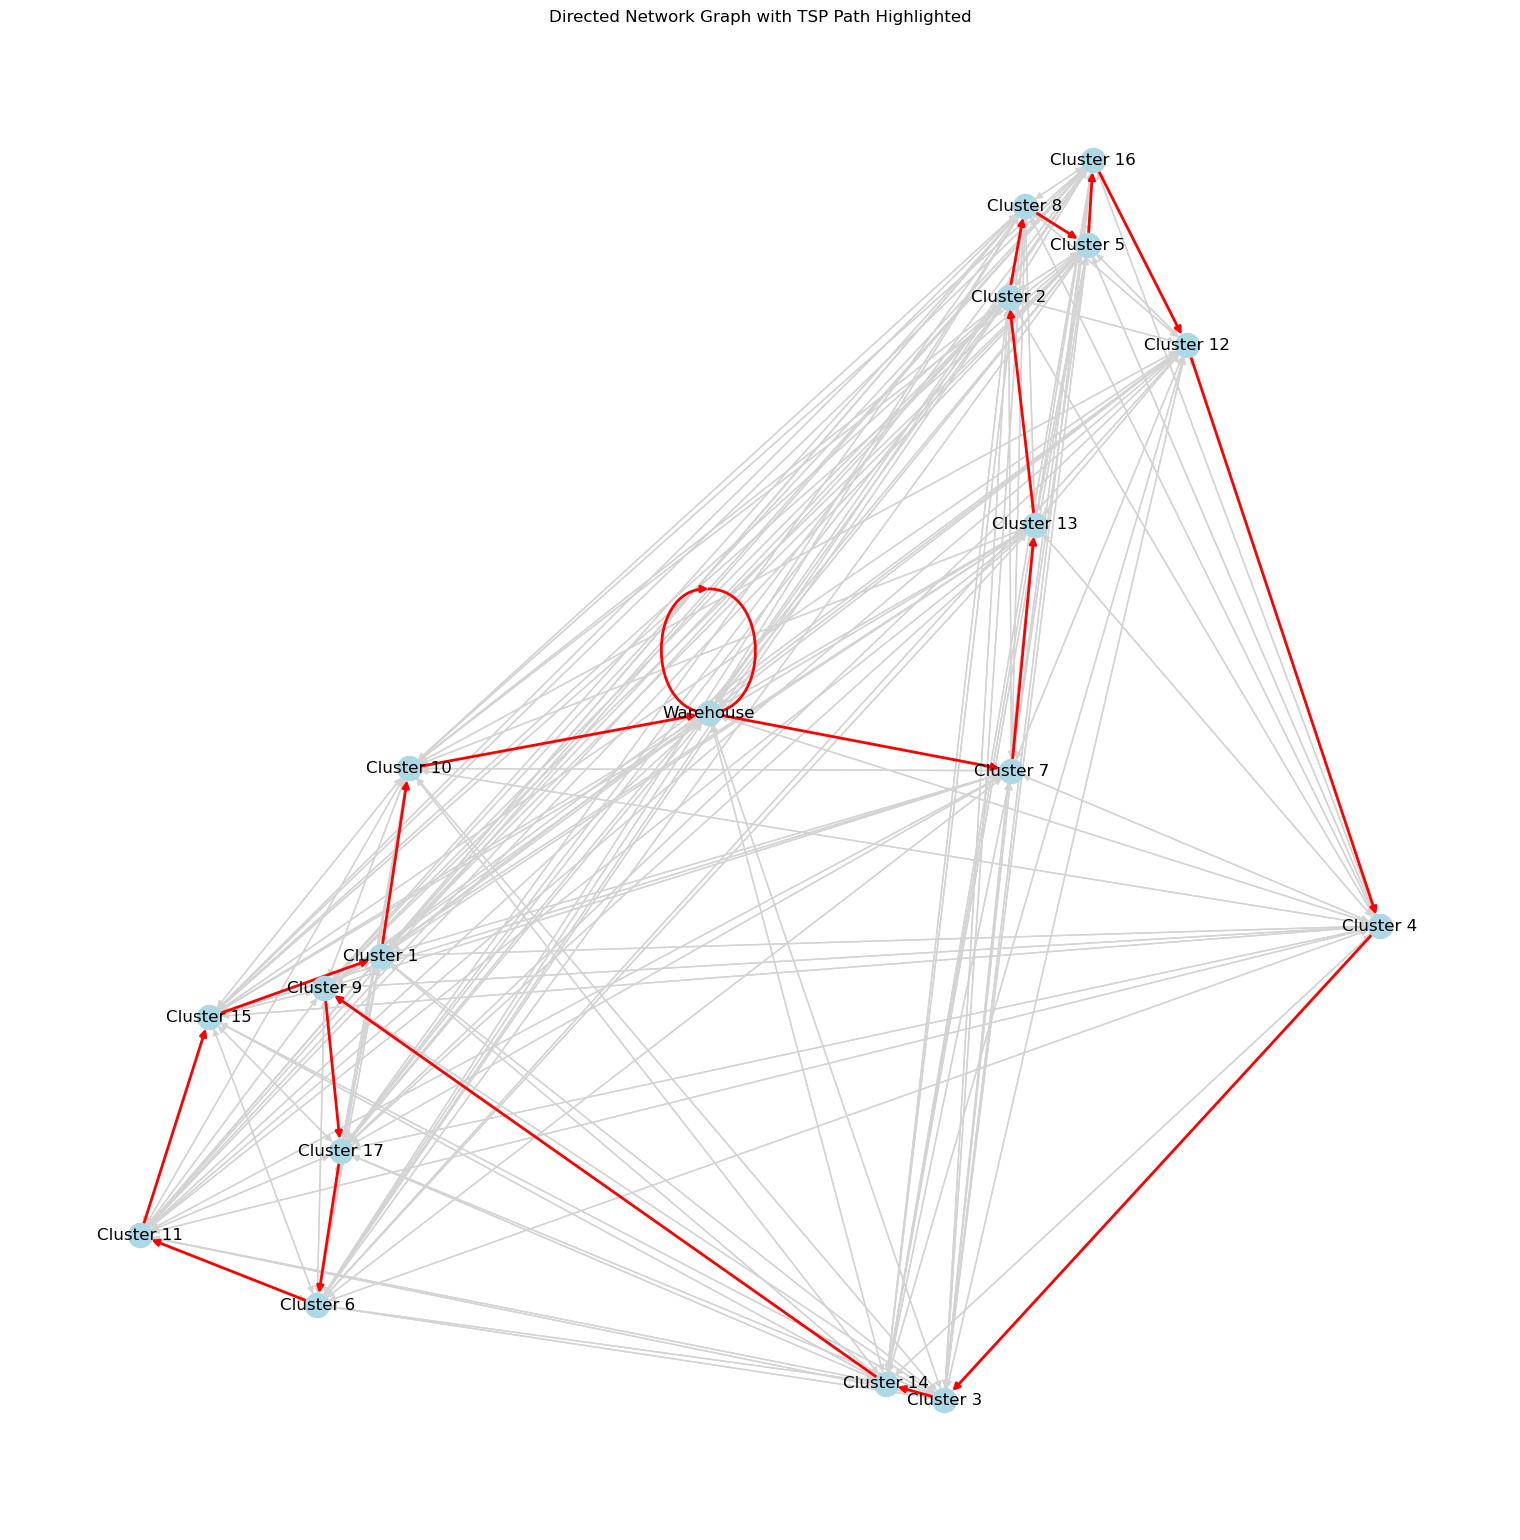

In [29]:
G = nx.DiGraph()

# Add warehouse node
G.add_node("Warehouse", pos=warehouse_coord)

# Add centroid nodes (clusters)
for i, centroid in enumerate(Centroids_locations, start=1):
    G.add_node(f"Cluster {i}", pos=centroid)

# Add edges for warehouse to each centroid and back
for i in range(1, len(Centroids_locations) + 1):
    G.add_edge("Warehouse", f"Cluster {i}", weight=warehouse_to_centroid_distances[i])
    G.add_edge(f"Cluster {i}", "Warehouse", weight=warehouse_to_centroid_distances[i])

# Add edges between clusters based on their distances
for (i, j), distance in full_centroid_distances.items():
    G.add_edge(f"Cluster {i}", f"Cluster {j}", weight=distance)
    G.add_edge(f"Cluster {j}", f"Cluster {i}", weight=distance)

    
from networkx.algorithms.approximation import traveling_salesman_problem


# Convert the directed graph to an undirected graph for TSP solving
UG = G.to_undirected()

# Solve the TSP on the undirected graph
tsp_path = traveling_salesman_problem(UG, weight='weight', cycle=True)

# tsp_path now contains the approximate shortest route visiting each cluster once and returning to the warehouse
    
plt.figure(figsize=(15, 15))
pos = {node: data['pos'] for node, data in G.nodes(data=True)}

# Draw all nodes and edges with light colors
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='lightgray', width=1, arrowsize=10)

# Highlight the TSP path with directed edges
path_edges = list(zip(tsp_path, tsp_path[1:] + [tsp_path[0]])) # Closing the loop
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)

plt.title("Directed Network Graph with TSP Path Highlighted")
plt.show()


In [16]:
# Ensure that 'Warehouse' is at the start and end of the tsp_path
if tsp_path[0] != 'Warehouse':
    tsp_path.insert(0, 'Warehouse')
if tsp_path[-1] != 'Warehouse':
    tsp_path.append('Warehouse')

# Calculate the total distance
total_distance = 0
for i in range(len(tsp_path) - 1):
    start, end = tsp_path[i], tsp_path[i+1]
    # Check if the edge exists in the graph
    if G.has_edge(start, end):
        total_distance += G[start][end]['weight']
    else:
        print(f"Edge from {start} to {end} not found in the graph.")

print("Total distance of the TSP path:", total_distance, "km")



Total distance of the TSP path: 1674.6559075708833 km


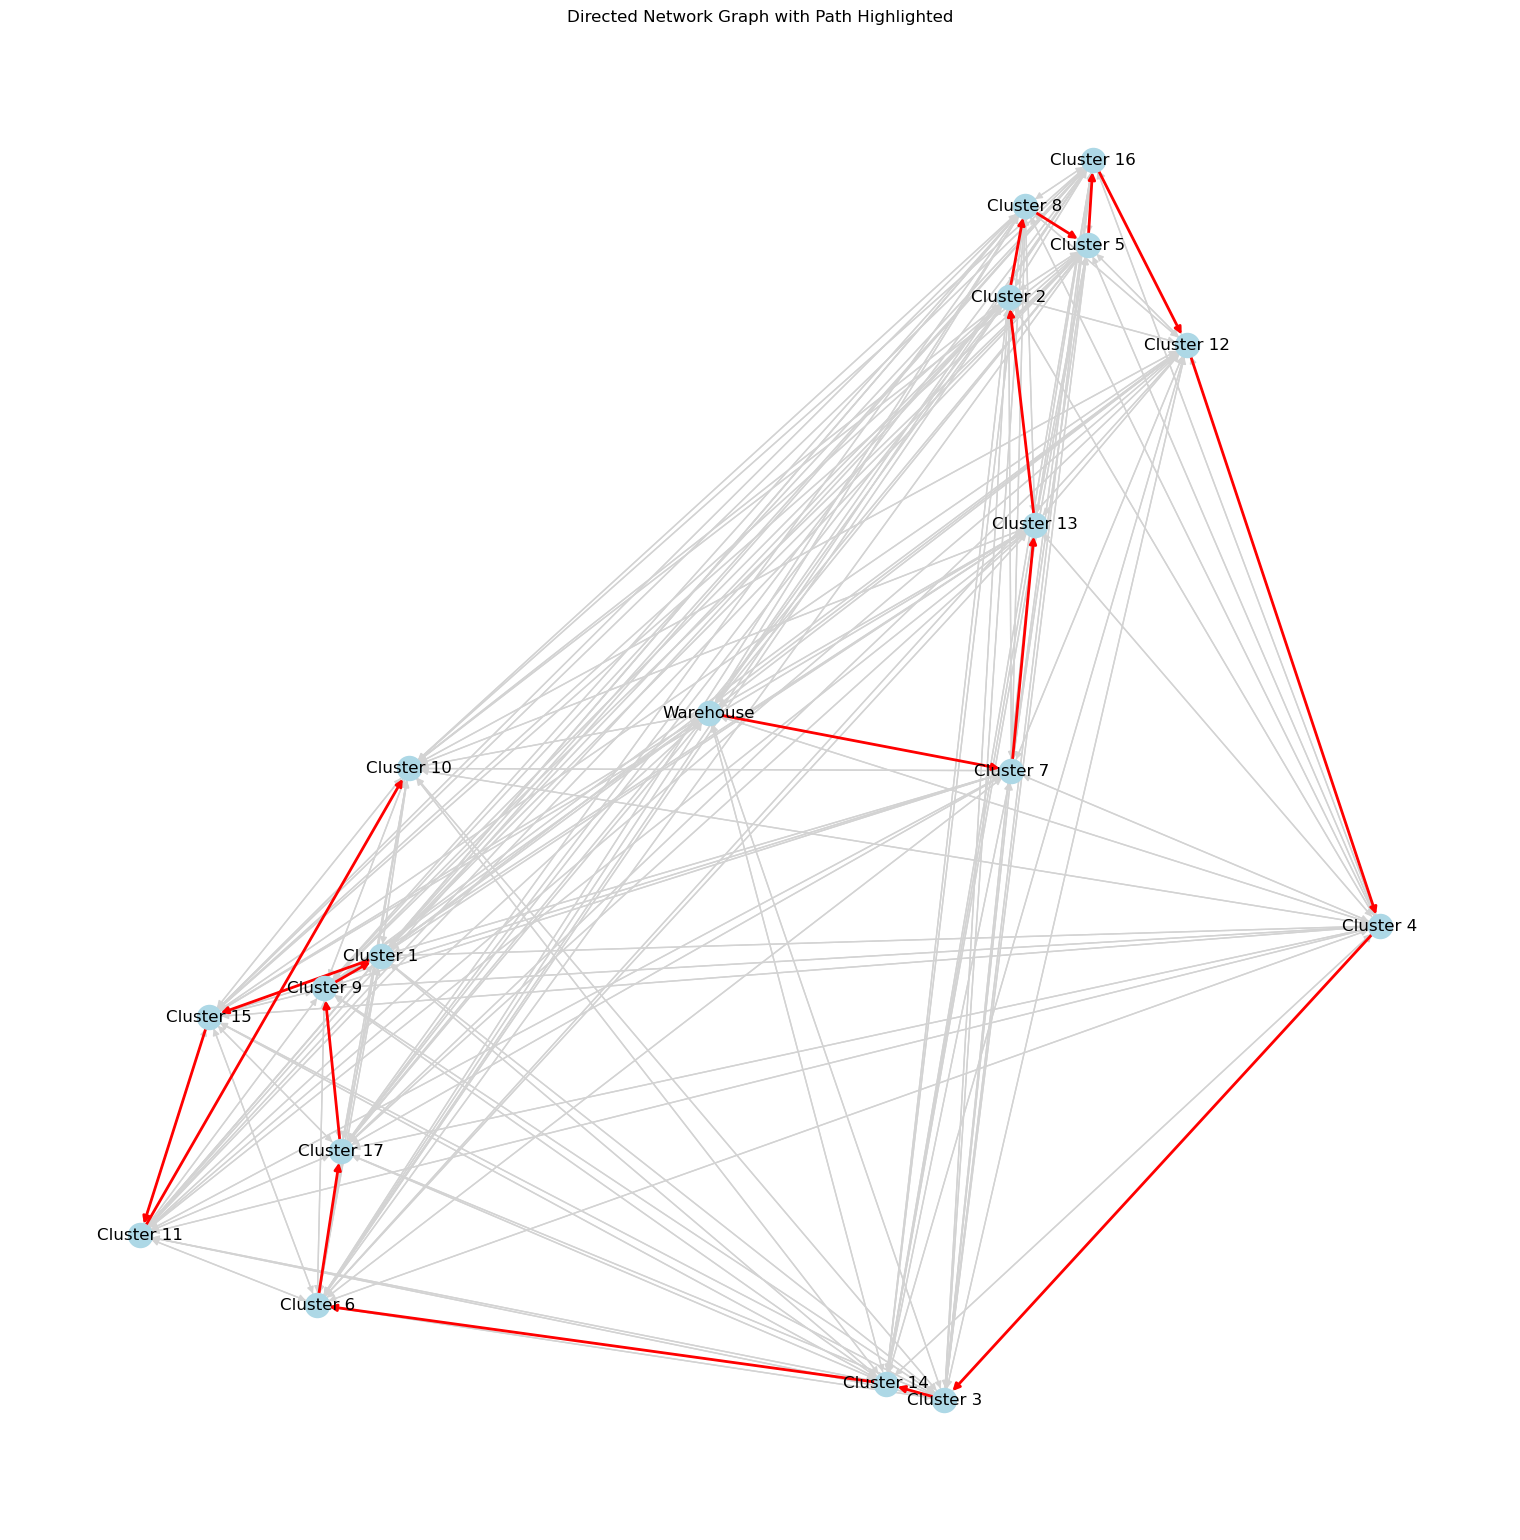

Path: Warehouse -> Cluster 7 -> Cluster 13 -> Cluster 2 -> Cluster 8 -> Cluster 5 -> Cluster 16 -> Cluster 12 -> Cluster 4 -> Cluster 3 -> Cluster 14 -> Cluster 6 -> Cluster 17 -> Cluster 9 -> Cluster 1 -> Cluster 15 -> Cluster 11 -> Cluster 10
Total Distance: 1596.2452888751588 km


In [28]:
def find_nearest_cluster_except_target(current_node, unvisited_clusters, target_cluster, graph):
    shortest_distance = float('inf')
    nearest_cluster = None
    for cluster in unvisited_clusters:
        if cluster == target_cluster and len(unvisited_clusters) > 1:
            continue  # Skip the target cluster if it's not the last one to visit
        if graph.has_edge(current_node, cluster):
            distance = graph[current_node][cluster]['weight']
            if distance < shortest_distance:
                shortest_distance = distance
                nearest_cluster = cluster
    return nearest_cluster, shortest_distance

# Initialize
current_node = "Warehouse"
target_cluster = "Cluster 10"  # Replace with your target cluster
unvisited_clusters = {f"Cluster {i}" for i in range(1, len(Centroids_locations) + 1)}
total_distance = 0
path = ["Warehouse"]

# Iteratively find the nearest cluster, excluding the target cluster unless it's the last
while unvisited_clusters:
    nearest_cluster, distance = find_nearest_cluster_except_target(
        current_node, unvisited_clusters, target_cluster, G)
    if nearest_cluster is None:
        break  # No path to remaining clusters
    unvisited_clusters.remove(nearest_cluster)
    total_distance += distance
    path.append(nearest_cluster)
    current_node = nearest_cluster
    if current_node == target_cluster:
        break  # Stop if the target cluster is reached and it's the last one

# Extract positions for nodes (assuming pos is a dictionary of node positions)
pos = nx.get_node_attributes(G, 'pos')

# Plotting the directed graph
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='lightgray', width=1)

# Highlight the path with directed edges
for i in range(len(path) - 1):
    nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1])], edge_color='red', width=2, arrows=True)

plt.title("Directed Network Graph with Path Highlighted")
plt.show()

print("Path:", ' -> '.join(path))
print("Total Distance:", total_distance, "km")